#Introduction Machine Learning using `scikit-learn`

###This workshop make uses the dataset that was used in the Kaggle Otto Challenge. 


###We will learn the following:
* Import data using `pandas`
* Build an initial linear model
* Understand how to evaluate the model
* Build on the linear model and add cross-validation and regularization
* Build logistic regression models - with cross-validation and regularization
* Build decision tree models
* Build random forest models

In [103]:
import numpy as np
import pandas as pd
import matplotlib

###Read in the datasets.
[source](https://www.kaggle.com/c/otto-group-product-classification-challenge/data)

In [104]:
train_pd = pd.read_csv("data/train.csv")
test_pd = pd.read_csv("data/test.csv")

### Let's see the number of rows and columns the train and test dataset has

In [105]:
train_pd.shape

(61878, 95)

In [106]:
test_pd.shape

(144368, 94)

###Taking a peek at the training dataset

In [107]:
train_pd.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


###What are the column types of each of the columns in the training dataset?

In [108]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

###Summary statistics of the training dataset

In [109]:
train_pd.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


###How many classes are there in the target?

In [110]:
train_pd.target.unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

###What is the distribution of the target?

In [111]:
train_pd.target.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
dtype: int64

###For creating models, the target has to be a numeric value. 
####Using the `preprocessing` module to create a column for each of the classes.

In [112]:
from sklearn import preprocessing

In [113]:
labels = train_pd.target.values

enc = preprocessing.LabelBinarizer()
binarized_labels = enc.fit_transform(labels)

In [114]:
binarized_labels[0:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [115]:
train_pd[train_pd.target == "Class_2"]

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
1929,1930,0,0,0,0,0,0,0,0,29,...,0,0,0,5,0,0,0,0,0,Class_2
1930,1931,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_2
1931,1932,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,Class_2
1932,1933,0,0,0,1,0,0,0,0,12,...,0,3,0,0,0,0,0,0,0,Class_2
1933,1934,0,0,0,1,0,0,0,0,18,...,0,2,0,1,0,0,0,0,0,Class_2
1934,1935,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Class_2
1935,1936,0,0,0,1,0,0,0,3,0,...,0,0,0,1,0,1,0,0,0,Class_2
1936,1937,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,Class_2
1937,1938,1,0,0,0,0,0,0,0,13,...,1,0,0,1,1,0,0,0,0,Class_2
1938,1939,0,0,0,0,0,0,0,0,0,...,0,4,0,2,0,0,0,0,0,Class_2


In [116]:
binarized_labels[1920:1940]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0]])

###Creating train and target dataset
###The models are created for *class_2*

In [117]:
target = binarized_labels[:,1]
train_pd = train_pd.drop("id", axis=1)
train_pd = train_pd.drop("target", axis=1)

##Model 1: Linear Regression

In [118]:
from sklearn import linear_model

In [119]:
ols = linear_model.LinearRegression(normalize=True, fit_intercept=True)

In [120]:
%timeit -n 1 ols.fit(train_pd, target, n_jobs=-1)

1 loops, best of 3: 926 ms per loop


In [121]:
ols.coef_

array([ -3.14982300e-03,   3.47221514e-03,  -1.42229541e-03,
        -4.14763764e-04,   3.42997381e-03,   6.25192239e-03,
         3.43866768e-03,  -4.29012175e-03,   1.12415154e-02,
        -3.26559447e-03,  -1.69684512e-02,   5.55673596e-03,
        -3.15315231e-03,   1.71719689e-02,   1.03620445e-02,
         1.53954874e-03,  -6.24911626e-03,   7.22623491e-04,
        -1.77014337e-03,  -7.30082475e-03,   6.00340306e-04,
        -4.60302936e-03,  -9.30699965e-03,   1.42825335e-03,
         1.99779617e-02,  -1.10315018e-02,  -9.65080310e-04,
        -3.27765172e-03,  -7.58392354e-03,  -7.05775582e-04,
         5.84541856e-04,  -6.44978225e-03,   2.80796165e-02,
        -1.24145829e-02,  -1.30099716e-03,  -1.04845101e-02,
        -1.18546643e-02,  -9.15970913e-04,  -5.20614655e-03,
         1.07416153e-02,  -1.52159677e-02,  -1.28705193e-02,
        -4.76401848e-03,  -2.54190978e-04,  -8.70311908e-06,
        -9.93784950e-04,  -3.81085921e-03,   1.85208275e-02,
         1.42715351e-04,

In [122]:
ols_predict = ols.predict(train_pd)

In [123]:
ols_predict

array([ 0.01636644,  0.24374971,  0.27022419, ...,  0.22284388,
        0.08496076, -0.01905893])

####Setting 0.5 as the decision boundary. If values are above 0.5, the prediction is set to 1. This means the record belongs to class 2. Else, the prediction is set to 0

In [124]:
ols_predict_raw = ols_predict.copy()
ols_predict[ols_predict > 0.5] = 1
ols_predict[ols_predict <= 0.5] = 0

In [125]:
ols_predict

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [126]:
ols_model_analysis = pd.concat([pd.Series(target), pd.Series(ols_predict)], axis=1)

In [127]:
ols_model_analysis.columns = ['actual', 'prediction']

In [128]:
ols_model_analysis[ols_model_analysis.actual == 1]

,actual,prediction
1929,1,1
1930,1,0
1931,1,0
1932,1,0
1933,1,1
1934,1,0
1935,1,0
1936,1,0
1937,1,0
1938,1,0


###Model Evaluation

In [129]:
true_positives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 1)]\
                    .sum()[0]
true_positives

7366.0

In [130]:
true_negatives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 0)]\
                    .sum()[0]
true_negatives

0.0

In [131]:
false_positives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 1)]\
                    .sum()[0]
false_positives

0.0

In [132]:
false_negatives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 0)]\
                    .sum()[0]
false_negatives

8756.0

In [133]:
precision = true_positives / (true_positives + false_positives)
precision

1.0

In [134]:
recall = true_positives / (true_positives + false_negatives)
recall

0.45689120456519045

In [135]:
from sklearn import metrics

In [136]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


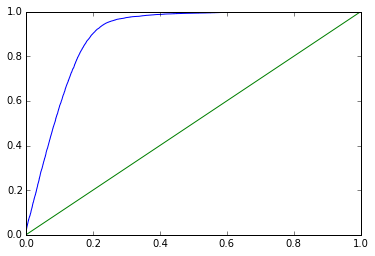

In [137]:
ols_auc = metrics.roc_auc_score(ols_model_analysis.actual, ols_predict_raw)
fpr, tpr, thresholds = metrics.roc_curve(ols_model_analysis.actual, ols_predict_raw)
pyplot.plot(fpr, tpr)
pyplot.plot([0,1],[0,1])

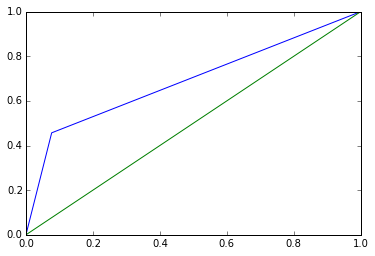

In [138]:
fpr, tpr, thresholds = metrics.roc_curve(ols_model_analysis.actual, ols_model_analysis.prediction)
pyplot.plot(fpr, tpr)
pyplot.plot([0,1],[0,1])

In [139]:
ols_auc

0.89794512670396931

In [140]:
ols_f1 = 2*true_positives / (2*true_positives + false_positives + false_negatives)

In [141]:
ols_f1

0.62721389645776571

## Train, Validate Datasets. Cross-validation

* Split training data into 80:20
* Train on 80, predict on 20
* Cross validation

In [142]:
from sklearn.cross_validation import train_test_split

In [143]:
sample_train, sample_validate, sample_train_target, sample_validate_target = train_test_split(train_pd, target, test_size = 0.2, random_state = 123)

In [144]:
sample_train.shape

(49502, 93)

In [145]:
sample_validate.shape

(12376, 93)

In [146]:
sample_train_target.shape

(49502,)

In [147]:
sample_validate_target.shape

(12376,)

In [148]:
ols = linear_model.LinearRegression(normalize=True)
%timeit -n 1 ols.fit(sample_train, sample_train_target, n_jobs=-1)
ols_sample_predict = ols.predict(sample_validate)

ols_predict_raw = ols_sample_predict.copy()
ols_sample_predict[ols_sample_predict > 0.5] = 1
ols_sample_predict[ols_sample_predict <= 0.5] = 0

ols_model_analysis = pd.concat([pd.Series(sample_validate_target), pd.Series(ols_sample_predict)], axis=1)
ols_model_analysis.columns = ['actual', 'prediction']

true_positives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 1)]\
                    .sum()[0]
true_negatives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 0)]\
                    .sum()[0]
false_positives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 1)]\
                    .sum()[0]
false_negatives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 0)]\
                    .sum()[0]

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

ols_auc = metrics.roc_auc_score(ols_model_analysis.actual, ols_model_analysis.prediction)
ols_f1 = 2*true_positives / (2*true_positives + false_positives + false_negatives)


1 loops, best of 3: 705 ms per loop


In [149]:
print precision
print recall
print ols_auc
print ols_f1

1.0
0.45322180917
0.686438189237
0.623747601791


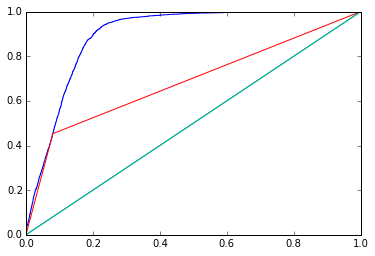

In [150]:
fpr, tpr, thresholds = metrics.roc_curve(ols_model_analysis.actual, ols_predict_raw)
pyplot.plot(fpr, tpr)
pyplot.plot([0,1],[0,1])

fpr, tpr, thresholds = metrics.roc_curve(ols_model_analysis.actual, ols_model_analysis.prediction)
pyplot.plot(fpr, tpr)
pyplot.plot([0,1],[0,1])

###`sklearn` has a `cross_validation` module to create the k-fold datasets

In [151]:
from sklearn.cross_validation import KFold

In [152]:
ols_kf = KFold(n=train_pd.shape[0], n_folds=5, shuffle=True)

In [153]:
ols_kf

sklearn.cross_validation.KFold(n=61878, n_folds=5, shuffle=True, random_state=None)

In [154]:
ols_cv_metrics = []
for train_index, validate_index in ols_kf:
    
    sample_train, sample_validate = train_pd.loc[train_index], train_pd.loc[validate_index]
    sample_train_target, sample_validate_target = target[train_index], target[validate_index]
    
    ols = linear_model.LinearRegression(normalize=True)
    %timeit -n 1 ols.fit(sample_train, sample_train_target, n_jobs=-1)
    ols_sample_predict = ols.predict(sample_validate)
    
    ols_predict_raw = ols_sample_predict.copy()
    ols_sample_predict[ols_sample_predict > 0.5] = 1
    ols_sample_predict[ols_sample_predict <= 0.5] = 0

    ols_model_analysis = pd.concat([pd.Series(sample_validate_target), pd.Series(ols_sample_predict)], axis=1)
    ols_model_analysis.columns = ['actual', 'prediction']

    true_positives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 1)]\
                        .sum()[0]
    true_negatives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 0)]\
                        .sum()[0]
    false_positives = ols_model_analysis[(ols_model_analysis.actual == 0) & (ols_model_analysis.prediction == 1)]\
                        .sum()[0]
    false_negatives = ols_model_analysis[(ols_model_analysis.actual == 1) & (ols_model_analysis.prediction == 0)]\
                        .sum()[0]

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    ols_auc = metrics.roc_auc_score(ols_model_analysis.actual, ols_model_analysis.prediction)
    ols_f1 = 2*true_positives / (2*true_positives + false_positives + false_negatives)
    
    ols_cv_metrics.append((precision, recall, ols_auc, ols_f1))
    

1 loops, best of 3: 696 ms per loop
1 loops, best of 3: 712 ms per loop
1 loops, best of 3: 681 ms per loop
1 loops, best of 3: 657 ms per loop
1 loops, best of 3: 658 ms per loop


In [155]:
ols_metric_pd = pd.DataFrame(ols_cv_metrics).mean()

In [156]:
ols_metrics_pd = pd.DataFrame(pd.DataFrame(ols_metric_pd).T)
ols_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print ols_metrics_pd

   precision    recall       auc        f1
0          1  0.455974  0.689491  0.626312


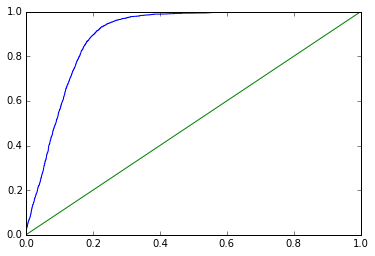

In [157]:
fpr, tpr, thresholds = metrics.roc_curve(ols_model_analysis.actual, ols_predict_raw)
pyplot.plot(fpr, tpr)
pyplot.plot([0,1],[0,1])

## Regularization
###To avoid overfitting, regularization is used.
* Ridge / LARS (L2)
* Lasso (L1)

## Ridge Regression

In [158]:
from sklearn.linear_model import Ridge

In [159]:
ridge = Ridge(normalize=True)

In [160]:
%timeit -n 1 ridge.fit(sample_train, sample_train_target)

1 loops, best of 3: 102 ms per loop


In [161]:
ridge_sample_predict = ridge.predict(sample_validate)

In [162]:
ridge_sample_predict

array([ 0.23847159,  0.09869083,  0.35982685, ...,  0.11722965,
        0.1865065 ,  0.07968807])

In [163]:
ridge_sample_predict[ridge_sample_predict > 0.5] = 1
ridge_sample_predict[ridge_sample_predict <= 0.5] = 0

In [164]:
ridge_sample_predict

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [165]:
ridge_model_analysis = pd.concat([pd.Series(sample_validate_target), pd.Series(ridge_sample_predict)], axis=1)

In [166]:
ridge_model_analysis.columns = ['actual', 'prediction']

In [167]:
ridge_model_analysis.head()

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [168]:
ridge_model_analysis[ridge_model_analysis.prediction == 1]

,actual,prediction
383,1,1
384,1,1
398,1,1
400,1,1
401,1,1
406,1,1
416,1,1
423,1,1
424,1,1
425,1,1


In [169]:
true_positives = ridge_model_analysis[(ridge_model_analysis.actual == 1) & (ridge_model_analysis.prediction == 1)]\
                    .sum()[0]
true_negatives = ridge_model_analysis[(ridge_model_analysis.actual == 0) & (ridge_model_analysis.prediction == 0)]\
                    .sum()[0]
false_positives = ridge_model_analysis[(ridge_model_analysis.actual == 0) & (ridge_model_analysis.prediction == 1)]\
                    .sum()[0]
false_negatives = ridge_model_analysis[(ridge_model_analysis.actual == 1) & (ridge_model_analysis.prediction == 0)]\
                    .sum()[0]

In [170]:
precision = true_positives / (true_positives + false_negatives)
recall = true_positives / (true_positives + false_positives)
ridge_auc = metrics.roc_auc_score(ridge_model_analysis.actual, ridge_model_analysis.prediction)
ridge_f1 = 2*(true_positives) / (2*true_positives + false_positives + false_negatives)

In [171]:
print precision
print recall
print ridge_auc
print ridge_f1

0.278325123153
1.0
0.614017387916
0.435452793834


In [172]:
#Creating a function for the cross-validation process.
def cross_validate(clf, train_pd, target):
    predict_raw = None
    clf_cv_metrics = []
    train, validate, train_target, validate_target = train_test_split(train_pd, target, test_size = 0.2)
    kf = KFold(n=train_pd.shape[0], n_folds=10, shuffle=True)
    for train_index, validate_index in kf:

        sample_train, sample_validate = train_pd.loc[train_index], train_pd.loc[validate_index]
        sample_train_target, sample_validate_target = target[train_index], target[validate_index]

        #ols = linear_model.LinearRegression(normalize=True)
        #print clf
        clf.fit(train, train_target)
        predict = clf.predict(validate)
        
        predict_raw
        predict_raw = predict.copy()
        predict[predict > 0.5] = 1
        predict[predict <= 0.5] = 0

        clf_model_analysis = pd.concat([pd.Series(validate_target), pd.Series(predict)], axis=1)
        clf_model_analysis.columns = ['actual', 'prediction']

        true_positives = clf_model_analysis[(clf_model_analysis.actual == 1) & (clf_model_analysis.prediction == 1)]\
                            .sum()[0]
        #print "tp ", true_positives
        true_negatives = clf_model_analysis[(clf_model_analysis.actual == 0) & (clf_model_analysis.prediction == 0)]\
                            .sum()[0]
        #print "tn ", true_negatives
        false_positives = clf_model_analysis[(clf_model_analysis.actual == 0) & (clf_model_analysis.prediction == 1)]\
                            .sum()[0]
        #print "fp ", false_positives
        false_negatives = clf_model_analysis[(clf_model_analysis.actual == 1) & (clf_model_analysis.prediction == 0)]\
                            .sum()[0]
        #print "fn ", false_negatives
        
        precision = float(true_positives) / float(true_positives + false_positives)
        recall = float(true_positives) / float(true_positives + false_negatives)

        clf_auc = metrics.roc_auc_score(clf_model_analysis.actual, clf_model_analysis.prediction)
        clf_f1 = float(2*true_positives) / float(2*true_positives + false_positives + false_negatives)

        clf_cv_metrics.append((precision, recall, clf_auc, clf_f1))
        
    fpr, tpr, thresholds = metrics.roc_curve(clf_model_analysis.actual, predict_raw)
    pyplot.plot(fpr, tpr)
    pyplot.plot([0,1],[0,1])
    return clf_cv_metrics

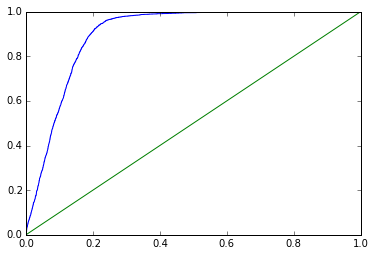

In [173]:
ridge = Ridge(normalize=True)
ridge_cv_metrics = cross_validate(ridge, train_pd, target)

In [174]:
ridge_metrics = pd.DataFrame(ridge_cv_metrics).mean()
ridge_metrics_pd = pd.DataFrame(pd.DataFrame(ridge_metrics).T)
ridge_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print ridge_metrics_pd

   precision    recall       auc        f1
0          1  0.270928  0.613244  0.426347


In [175]:
ols_metrics_pd

,precision,recall,auc,f1
0,1,0.455974,0.689491,0.626312


## LASSO

In [176]:
lasso = linear_model.Lasso(alpha=0.1, selection='random')

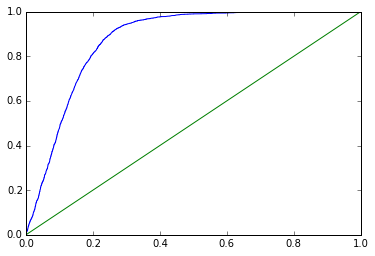

In [177]:
lasso_cv_metrics = cross_validate(lasso,train_pd, target)

In [178]:
lasso_cv_metrics = pd.DataFrame(lasso_cv_metrics).mean()
lasso_cv_metrics_pd = pd.DataFrame(pd.DataFrame(lasso_cv_metrics).T)
lasso_cv_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print lasso_cv_metrics_pd

   precision    recall       auc        f1
0          1  0.237833  0.593963  0.384273


## Model 2: Logistic Regression

In [179]:
log_reg_l2 = linear_model.LogisticRegression(C=1, penalty='l2')

   precision    recall       auc        f1
0          1  0.714417  0.799443  0.833423


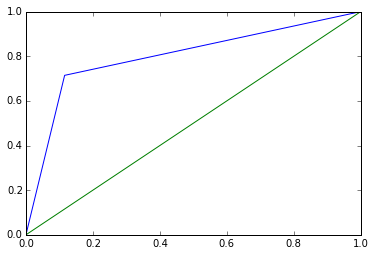

In [180]:
log_reg_l2_cv = cross_validate(log_reg_l2, train_pd, target)
log_reg_l2_cv_metrics = pd.DataFrame(log_reg_l2_cv).mean()
log_reg_l2_metrics_pd = pd.DataFrame(pd.DataFrame(log_reg_l2_cv_metrics).T)
log_reg_l2_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print log_reg_l2_metrics_pd

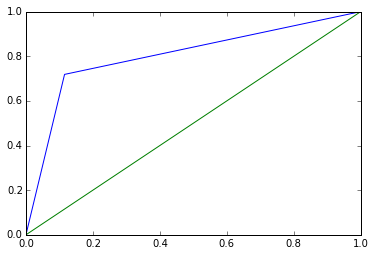

In [181]:
log_reg_l1 = linear_model.LogisticRegression(C=0.1, penalty='l1')
log_reg_l1_cv_metrics = cross_validate(log_reg_l1, train_pd, target)

In [182]:
log_reg_l1_metrics = pd.DataFrame(log_reg_l1_cv_metrics).mean()
log_reg_l1_metrics_pd = pd.DataFrame(pd.DataFrame(log_reg_l1_metrics).T)
log_reg_l1_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print log_reg_l1_metrics_pd

   precision    recall       auc        f1
0          1  0.718546  0.801629  0.836226


## Model 3: Decision Trees

In [183]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [184]:
dtc = DecisionTreeClassifier(max_depth=8)

In [185]:
dtc.fit(train_pd, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

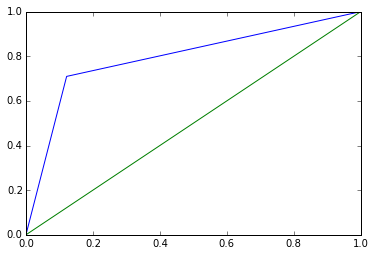

In [186]:
dtc_cv_metric = cross_validate(dtc, train_pd, target)

In [187]:
dtc_metrics = pd.DataFrame(dtc_cv_metric).mean()
dtc_metrics_pd = pd.DataFrame(pd.DataFrame(dtc_metrics).T)
dtc_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print dtc_metrics_pd

   precision    recall      auc        f1
0          1  0.708548  0.79364  0.829416


In [188]:
export_graphviz(dtc, feature_names=train_pd.columns)

In [189]:
!dot -Tpng tree.dot -o tree.png

In [190]:
from IPython.display import Image

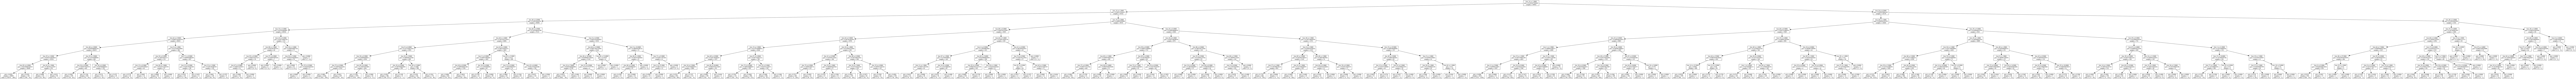

In [191]:
Image('tree.png', unconfined=True)

## Model 4: Random Forests

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf_clf = RandomForestClassifier(n_jobs=-1)

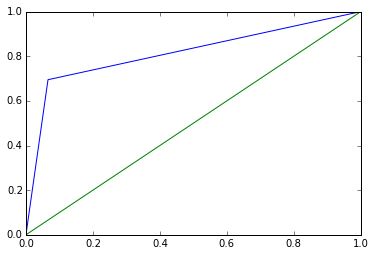

In [194]:
rf_clf_cv_metric = cross_validate(rf_clf, train_pd, target)

In [195]:
rf_clf_cv_metrics = pd.DataFrame(rf_clf_cv_metric).mean()
rf_clf_cv_metrics_pd = pd.DataFrame(pd.DataFrame(rf_clf_cv_metrics).T)
rf_clf_cv_metrics_pd.columns=['precision', 'recall', 'auc', 'f1']
print rf_clf_cv_metrics_pd

   precision    recall       auc        f1
0          1  0.685422  0.810167  0.813335


##Model Comparison

In [196]:
frames = [ols_metrics_pd, ridge_metrics_pd, lasso_cv_metrics_pd, log_reg_l1_metrics_pd, log_reg_l2_metrics_pd, dtc_metrics_pd, rf_clf_cv_metrics_pd]
model_analysis = pd.concat(frames)
model_analysis['model_name'] = ['Linear Regression', 'L2 Linear Reg', 'L1 Linear Reg', 'L1 Logistic Reg', 'L2 Logistic Reg', 'Decision Tree', 'Random Forest']
model_analysis

,precision,recall,auc,f1,model_name
0,1,0.455974,0.689491,0.626312,Linear Regression
0,1,0.270928,0.613244,0.426347,L2 Linear Reg
0,1,0.237833,0.593963,0.384273,L1 Linear Reg
0,1,0.718546,0.801629,0.836226,L1 Logistic Reg
0,1,0.714417,0.799443,0.833423,L2 Logistic Reg
0,1,0.708548,0.793640,0.829416,Decision Tree
0,1,0.685422,0.810167,0.813335,Random Forest
